<a href="https://colab.research.google.com/github/AnimeshGalande/NLP/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [100]:
Data =  pd.read_csv('Churn_Modelling.csv')
X = Data.iloc[:, 3:13]
y = Data.iloc[:, 13]
Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
Geography = pd.get_dummies(X['Geography'])
Gender = pd.get_dummies(X['Gender'])

In [5]:
X=pd.concat([X,Geography,Gender],axis=1)
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU,ELU
from keras.layers import Dropout

In [10]:
classifier = Sequential()

In [11]:
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_dim=13))

In [12]:
#second layer
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform'))

In [13]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [15]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6314 - accuracy: 0.7557 - val_loss: 0.5784 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5771 - accuracy: 0.7963 - val_loss: 0.5437 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7934 - val_loss: 0.5187 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.7961 - val_loss: 0.5011 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5051 - accuracy: 0.7881 - val_loss: 0.4872 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.7937 - val_loss: 0.4763 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.8058 - val_loss: 0.4670 - val_accuracy: 0.7955

In [101]:
ypred = classifier.predict(X_test)
ypred = (ypred > 0.5)
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
print("Confussion matrix:", confusion_matrix(y_test,ypred))
print("Accuracy score:", accuracy_score(y_test,ypred))

Confussion matrix: [[1508   87]
 [ 199  206]]
Accuracy score: 0.857


In [20]:
#tried with optimiser adam
classifier = Sequential()
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_dim=13))
#second layer
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform'))
#output layer
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
print("Classifier.summary",classifier.summary())
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
ypred = classifier.predict(X_test)
ypred = (ypred > 0.5)
print("Confussion matrix:", confusion_matrix(y_test,ypred))
print("Accuracy score:", accuracy_score(y_test,ypred))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Classifier.summary None
Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7939 - val_loss: 0.5089 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.7970 - val_loss: 0.4852 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0

In [ ]:
#tried with optimiser adam increase in no of neuron and added a new hidden layer
classifier = Sequential()
classifier.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform',input_dim=13))
#second layer
classifier.add(Dense(units=20,activation='relu',kernel_initializer='he_uniform'))
#third layer
classifier.add(Dense(units=30,activation='relu',kernel_initializer='he_uniform'))
#output layer
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
print("Classifier.summary",classifier.summary())
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
ypred = classifier.predict(X_test)
ypred = (ypred > 0.5)
print("Confussion matrix:", confusion_matrix(y_test,ypred))
print("Accuracy score:", accuracy_score(y_test,ypred))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_31 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 31        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
Classifier.summary None
Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7616 - val_loss: 0.4573 - val_accuracy: 0.8005
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4314 

In [ ]:
# lets try dropout
classifier = Sequential()
classifier.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform',input_dim=13))
classifier.add(Dropout(0.2))
#second layer
classifier.add(Dense(units=20,activation='relu',kernel_initializer='he_uniform'))
classifier.add(Dropout(0.3))
#third layer
classifier.add(Dense(units=30,activation='relu',kernel_initializer='he_uniform'))
classifier.add(Dropout(0.4))
#output layer
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
print("Classifier.summary",classifier.summary())
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
ypred = classifier.predict(X_test)
ypred = (ypred > 0.5)
print("Confussion matrix:", confusion_matrix(y_test,ypred))
print("Accuracy score:", accuracy_score(y_test,ypred))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 30)                630       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)               

In [21]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


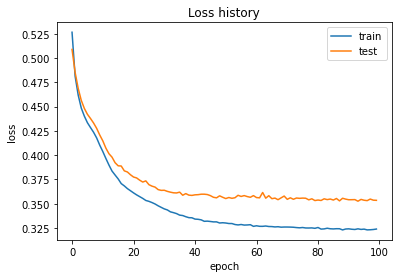

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

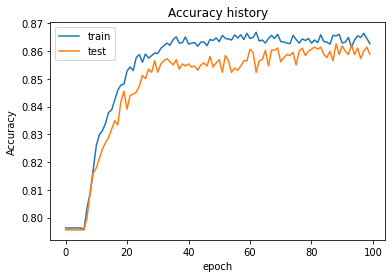

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy history')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

Hyper parameter
this help to find the right combination of neurons and layers

In [79]:
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import  GridSearchCV
from keras.layers import ReLU , LeakyReLU , ELU , Dropout , Dense , Activation , Embedding , BatchNormalization, Flatten
from keras.activations import sigmoid,relu

def create_model(layers):
  model = Sequential()
  for i , nodes in enumerate(layers):
    if i ==0:
      model.add(Dense(nodes,input_dim = X_train.shape[1]))
      model.add(Activation('relu'))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes))
      model.add(Activation('relu'))
      model.add(Dropout(0.3))
  
  model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [87]:
model = KerasClassifier(build_fn=create_model)


#here i am specifing how many layers i want in first trial 1 layer with 20 neurons 
# second on specifies 2 layers with 40 ann 20 neurons resp.. and so on

In [90]:
layer = [[10,20],[20,30]]
activation = ['relu']
param = dict(layers = layer,batch_size = [128,256],epochs = [30])

In [91]:
grid = GridSearchCV(estimator=model,param_grid=param ,cv = 5)
grid_result = grid.fit(X_train,y_train)

Epoch 1/30
50/50 [==============================] - 1s 2ms/step - loss: 0.8158 - accuracy: 0.3231
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.7119
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.7842
Epoch 4/30
50/50 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7912
Epoch 5/30
50/50 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.7948
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7939
Epoch 7/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.8011
Epoch 8/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.8038
Epoch 9/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.8063
Epoch 10/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7911
Epoch 11/30
50/50 [

RuntimeError: ignored

In [70]:
model = create_model(layers=[10 , 20] , activations= 'relu')

In [73]:
model.fit(X_train,y_train,batch_size= 10,epochs = 20)

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4795 - accuracy: 0.7965
Epoch 2/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8083
Epoch 3/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4397 - accuracy: 0.8129
Epoch 4/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8139
Epoch 5/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4340 - accuracy: 0.8114
Epoch 6/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8116
Epoch 7/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8138
Epoch 8/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8142
Epoch 9/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8109
Epoch 10/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4198 - accuracy: 0.8167

In [92]:
check_params(
    params
)

NameError: ignored

In [97]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation('relu'))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation('relu'))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='Adamax', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, batch_size = [128, 256], epochs=[1])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, y_train)

7/7 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7969


RuntimeError: ignored

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])